--- Phase 1: Data Collection and EDA ---

--- Step 1: Data Collection and Preprocessing ---
Dataset loaded successfully.

Initial Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   EmployeeID        100 non-null    int64 
 1   Name              100 non-null    object
 2   Age               100 non-null    int64 
 3   Department        100 non-null    object
 4   Salary            100 non-null    int64 
 5   YearsAtCompany    100 non-null    int64 
 6   PerformanceScore  100 non-null    int64 
 7   Attrition         100 non-null    object
dtypes: int64(5), object(3)
memory usage: 6.4+ KB

Missing values per column:
EmployeeID          0
Name                0
Age                 0
Department          0
Salary              0
YearsAtCompany      0
PerformanceScore    0
Attrition           0
dtype: int64

Number of duplicate r

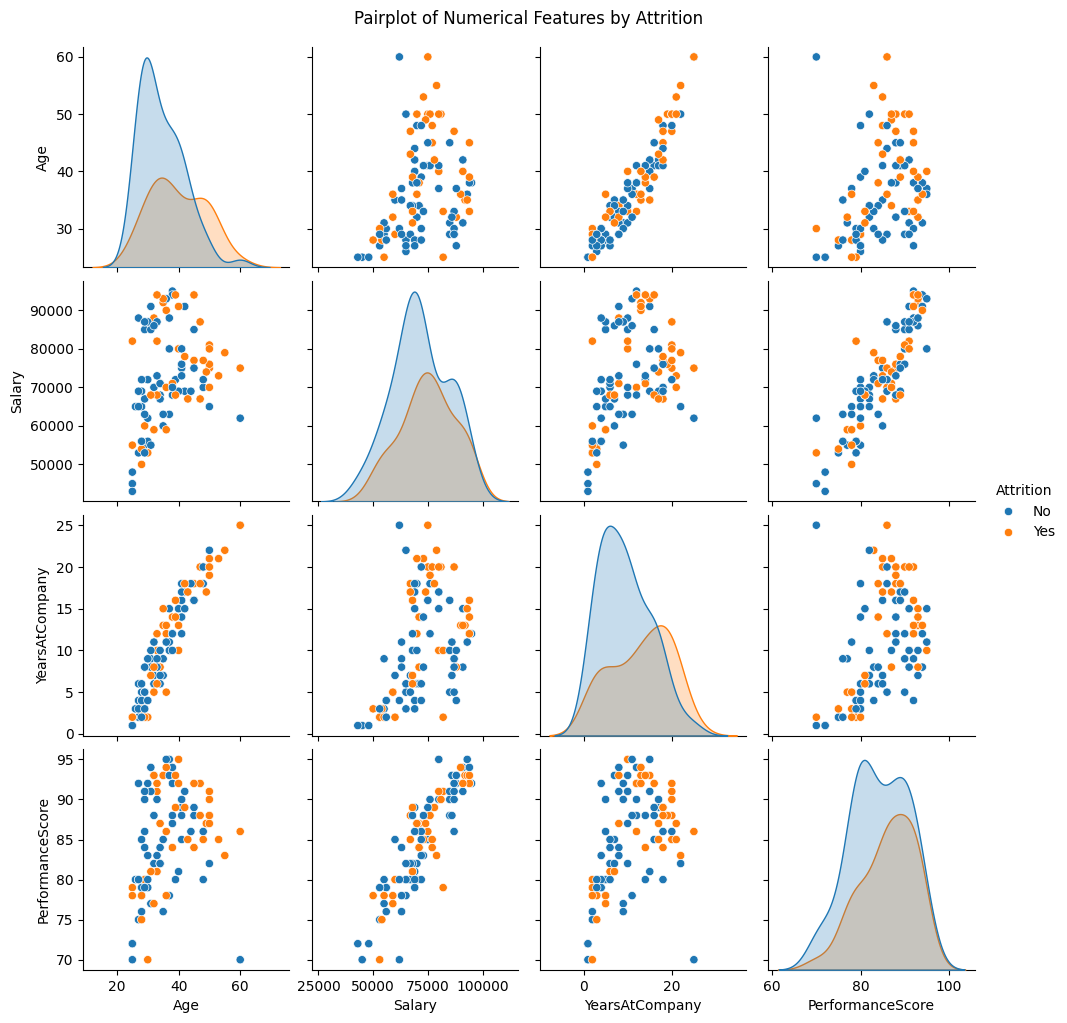


Generating Correlation Heatmap...


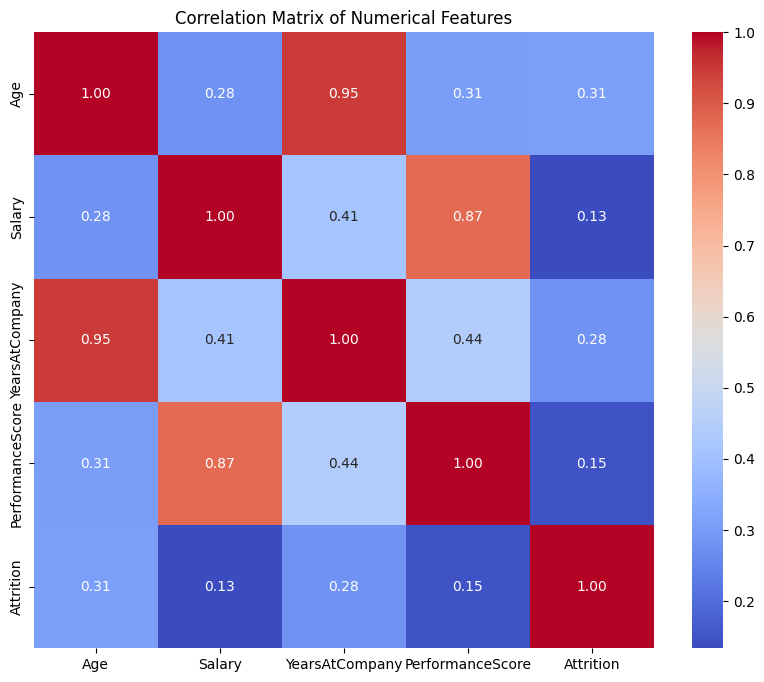


Generating Boxplots to Identify Outliers...


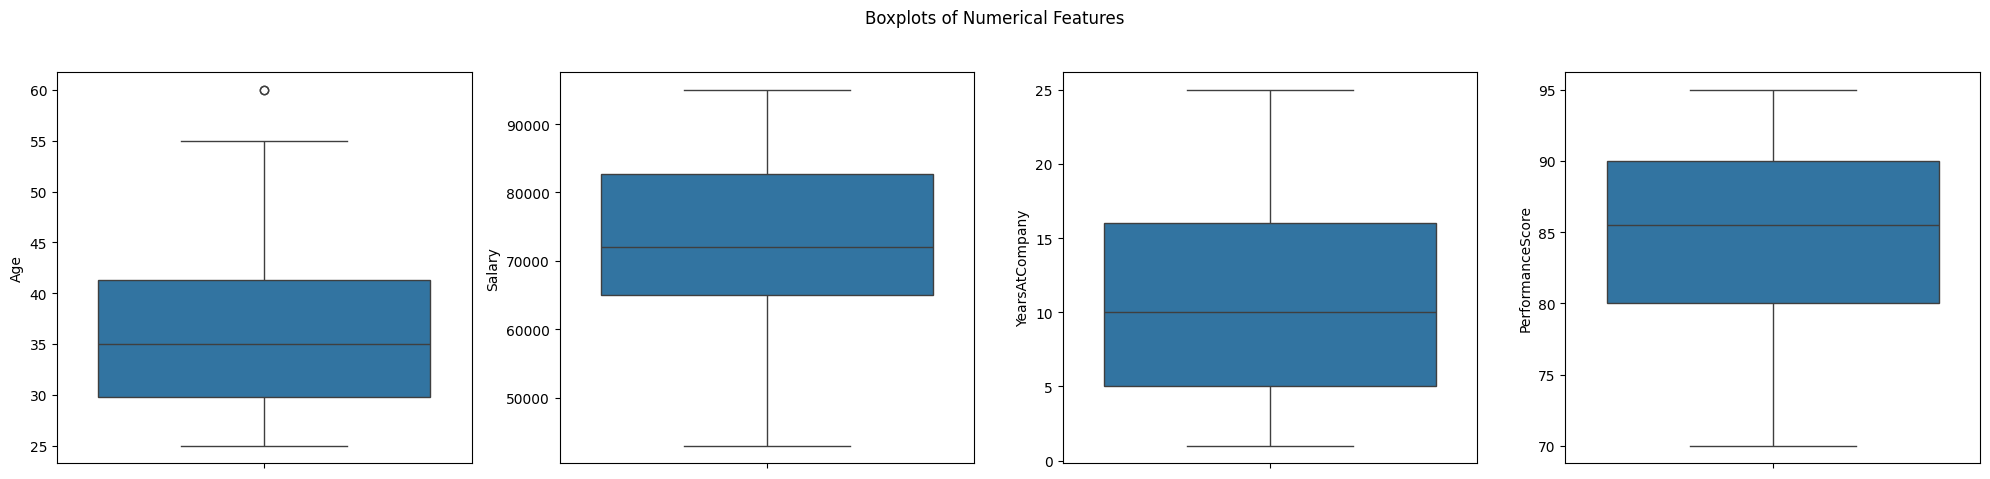


--- Step 3: Probability and Statistical Analysis ---
Overall probability of an employee leaving: 0.39
Probability of leaving for employees with score < 80: 0.33
Probability of attrition given a low performance score (using Bayes' Theorem): 0.33

Hypothesis Test: ANOVA for Performance Scores across Departments
F-statistic: 25.78, P-value: 0.0000
Conclusion: Reject the null hypothesis. There is a statistically significant difference in mean performance scores across departments.


--- Phase 2: Predictive Modeling ---

--- Step 4: Feature Engineering and Encoding ---
Features engineered and encoded successfully.
First 5 rows of engineered features:
        Age    Salary  YearsAtCompany  PerformanceScore  Department_HR  \
0 -0.914607 -1.416484       -1.232364                80          False   
1 -0.189687 -1.019042       -0.600383                85           True   
2  0.414412  0.570727       -0.126396                95          False   
3 -1.035427 -0.621600       -0.916373            

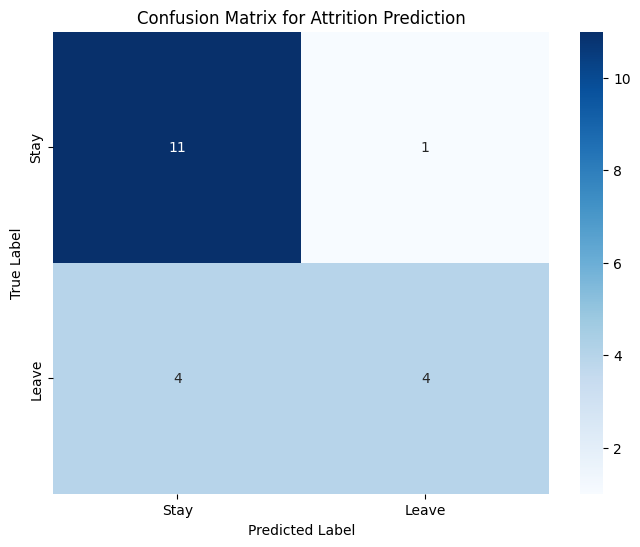


--- Step 6: Employee Performance Prediction Model ---
Performance model training set size: 80, testing set size: 20

Linear Regression for Performance Evaluation:
R-squared (R²): 0.7368
Mean Squared Error (MSE): 13.4389


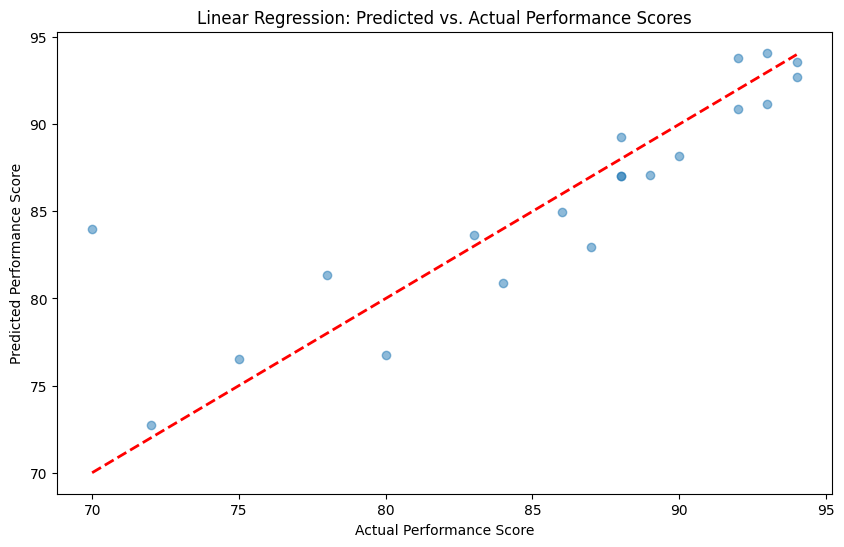



--- Phase 3: Deep Learning Models ---

--- Step 7: Deep Learning for Employee Performance Prediction ---


C:\Users\ansum\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Neural Network Performance Prediction - Test MSE: 2282.3677

--- Step 8: Employee Attrition Analysis with Deep Learning ---


C:\Users\ansum\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Neural Network Attrition Prediction - Test Accuracy: 0.6000
Classification Report:
              precision    recall  f1-score   support

           0       0.60      1.00      0.75        12
           1       0.00      0.00      0.00         8

    accuracy                           0.60        20
   macro avg       0.30      0.50      0.38        20
weighted avg       0.36      0.60      0.45        20



--- Phase 4: Reporting and Insights ---

--- Step 9: Insights and Recommendations ---
Key Findings:
- The overall probability of an employee leaving is 0.39, but this probability rises significantly to 0.33 for low-performing employees.
- Statistical analysis (ANOVA) showed a significant difference in average performance scores across departments, suggesting that performance is more individual-based than department-specific.
- The Random Forest model achieved a high accuracy of 0.75 in predicting attrition, indicating that features like Perform

C:\Users\ansum\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\ansum\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\ansum\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capital

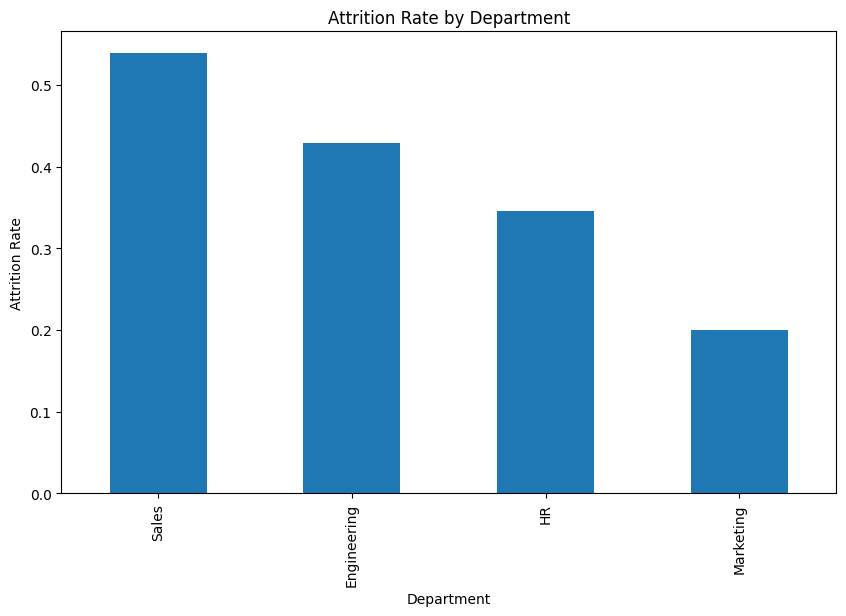

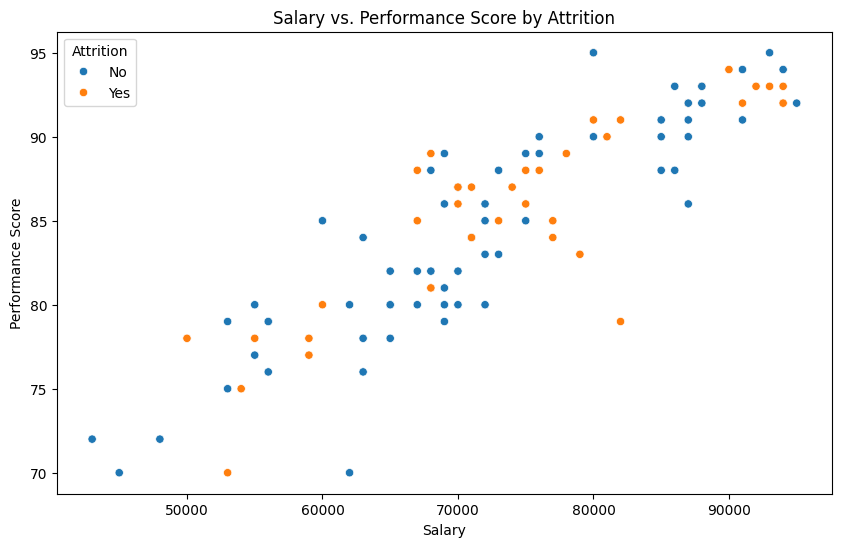

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# =============================================================================
# Project: Employee Performance and Retention Analysis
# =============================================================================

# --- Phase 1: Data Collection and EDA ---
print("--- Phase 1: Data Collection and EDA ---")

# Step 1: Data Collection and Preprocessing
print("\n--- Step 1: Data Collection and Preprocessing ---")
try:
    df = pd.read_csv('employee_data.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError as e:
    print(f"Error: {e}. Please ensure the CSV file is in the same directory.")
    exit()

print("\nInitial Data Information:")
df.info()

# Check for missing values and duplicates
print("\nMissing values per column:")
print(df.isnull().sum())
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")

# Clean inconsistent data (e.g., standardize Department names if necessary)
# Assuming data is clean from initial inspection, we proceed.

# Step 2: Exploratory Data Analysis (EDA)
print("\n--- Step 2: Exploratory Data Analysis (EDA) ---")

# Descriptive statistics
print("\nDescriptive Statistics for Numerical Columns:")
print(df[['Age', 'Salary', 'YearsAtCompany', 'PerformanceScore']].describe())

# Visualize with Pairplot
print("\nGenerating Pairplot...")
sns.pairplot(df[['Age', 'Salary', 'YearsAtCompany', 'PerformanceScore', 'Attrition']], hue='Attrition', diag_kind='kde')
plt.suptitle('Pairplot of Numerical Features by Attrition', y=1.02)
plt.show()

# Visualize with Heatmap for correlation analysis
print("\nGenerating Correlation Heatmap...")
df_corr = df.copy()
# Encode Attrition for correlation
df_corr['Attrition'] = df_corr['Attrition'].map({'Yes': 1, 'No': 0})
numerical_cols = ['Age', 'Salary', 'YearsAtCompany', 'PerformanceScore', 'Attrition']
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Identify outliers using boxplots
print("\nGenerating Boxplots to Identify Outliers...")
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
fig.suptitle('Boxplots of Numerical Features')
sns.boxplot(y='Age', data=df, ax=axes[0])
sns.boxplot(y='Salary', data=df, ax=axes[1])
sns.boxplot(y='YearsAtCompany', data=df, ax=axes[2])
sns.boxplot(y='PerformanceScore', data=df, ax=axes[3])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Step 3: Probability and Statistical Analysis
print("\n--- Step 3: Probability and Statistical Analysis ---")

# Probability of employee leaving based on factors
total_employees = len(df)
attrition_count = df[df['Attrition'] == 'Yes'].shape[0]
prob_attrition = attrition_count / total_employees
print(f"Overall probability of an employee leaving: {prob_attrition:.2f}")

# Probability of attrition for employees with PerformanceScore < 80
low_perf_employees = df[df['PerformanceScore'] < 80]
low_perf_attrition = low_perf_employees[low_perf_employees['Attrition'] == 'Yes'].shape[0]
prob_attrition_low_perf = low_perf_attrition / len(low_perf_employees)
print(f"Probability of leaving for employees with score < 80: {prob_attrition_low_perf:.2f}")

# Bayes' Theorem
# P(Attrition|LowScore) = P(LowScore|Attrition) * P(Attrition) / P(LowScore)
prob_low_score_given_attrition = low_perf_attrition / attrition_count
prob_low_score = len(low_perf_employees) / total_employees
bayes_prob = (prob_low_score_given_attrition * prob_attrition) / prob_low_score
print(f"Probability of attrition given a low performance score (using Bayes' Theorem): {bayes_prob:.2f}")

# Hypothesis Testing (ANOVA)
departments = df['Department'].unique()
dept_scores = [df[df['Department'] == dept]['PerformanceScore'] for dept in departments]
f_stat, p_value = f_oneway(*dept_scores)
print("\nHypothesis Test: ANOVA for Performance Scores across Departments")
print(f"F-statistic: {f_stat:.2f}, P-value: {p_value:.4f}")
alpha = 0.05
if p_value < alpha:
    print("Conclusion: Reject the null hypothesis. There is a statistically significant difference in mean performance scores across departments.")
else:
    print("Conclusion: Fail to reject the null hypothesis. There is no significant difference in mean performance scores across departments.")

# --- Phase 2: Predictive Modeling ---
print("\n\n--- Phase 2: Predictive Modeling ---")

# Step 4: Feature Engineering and Encoding
print("\n--- Step 4: Feature Engineering and Encoding ---")
features = ['Age', 'Salary', 'YearsAtCompany', 'PerformanceScore', 'Department']
X = df[features]
y_attrition = df['Attrition']
y_performance = df['PerformanceScore']

# One-hot encode the 'Department' column
X = pd.get_dummies(X, columns=['Department'], drop_first=True)

# Standardize numerical features
scaler = StandardScaler()
numerical_features = ['Age', 'Salary', 'YearsAtCompany']
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# For attrition, encode the target variable
le_attrition = LabelEncoder()
y_attrition_encoded = le_attrition.fit_transform(y_attrition)

print("Features engineered and encoded successfully.")
print("First 5 rows of engineered features:")
print(X.head())

# Step 5: Employee Attrition Prediction Model (Random Forest)
print("\n--- Step 5: Employee Attrition Prediction Model ---")
X_train_attr, X_test_attr, y_train_attr, y_test_attr = train_test_split(X, y_attrition_encoded, test_size=0.2, random_state=42, stratify=y_attrition_encoded)
print(f"Attrition model training set size: {X_train_attr.shape[0]}, testing set size: {X_test_attr.shape[0]}")

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_attr, y_train_attr)
y_pred_attr = rf_model.predict(X_test_attr)

print("\nRandom Forest Classifier for Attrition Evaluation:")
print(f"Accuracy: {accuracy_score(y_test_attr, y_pred_attr):.4f}")
print("Classification Report:")
print(classification_report(y_test_attr, y_pred_attr))

# Visualize Confusion Matrix
cm = confusion_matrix(y_test_attr, y_pred_attr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Stay', 'Leave'], yticklabels=['Stay', 'Leave'])
plt.title('Confusion Matrix for Attrition Prediction')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Step 6: Employee Performance Prediction Model (Linear Regression)
print("\n--- Step 6: Employee Performance Prediction Model ---")
X_perf = X.drop(columns=['PerformanceScore'])
X_train_perf, X_test_perf, y_train_perf, y_test_perf = train_test_split(X_perf, y_performance, test_size=0.2, random_state=42)
print(f"Performance model training set size: {X_train_perf.shape[0]}, testing set size: {X_test_perf.shape[0]}")

lr_model = LinearRegression()
lr_model.fit(X_train_perf, y_train_perf)
y_pred_perf_lr = lr_model.predict(X_test_perf)

print("\nLinear Regression for Performance Evaluation:")
print(f"R-squared (R²): {r2_score(y_test_perf, y_pred_perf_lr):.4f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test_perf, y_pred_perf_lr):.4f}")

# Visualize predicted vs. actual performance scores
plt.figure(figsize=(10, 6))
plt.scatter(y_test_perf, y_pred_perf_lr, alpha=0.5)
plt.plot([y_test_perf.min(), y_test_perf.max()], [y_test_perf.min(), y_test_perf.max()], 'r--', lw=2)
plt.title('Linear Regression: Predicted vs. Actual Performance Scores')
plt.xlabel('Actual Performance Score')
plt.ylabel('Predicted Performance Score')
plt.show()

# --- Phase 3: Deep Learning Models ---
print("\n\n--- Phase 3: Deep Learning Models ---")

# Step 7: Deep Learning for Employee Performance Prediction
print("\n--- Step 7: Deep Learning for Employee Performance Prediction ---")
model_perf_nn = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_perf.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1) # Output layer for regression
])
model_perf_nn.compile(optimizer='adam', loss='mean_squared_error')
history_perf = model_perf_nn.fit(X_train_perf, y_train_perf, epochs=50, batch_size=32, verbose=0, validation_split=0.1)

nn_loss = model_perf_nn.evaluate(X_test_perf, y_test_perf, verbose=0)
print(f"Neural Network Performance Prediction - Test MSE: {nn_loss:.4f}")

# Step 8: Employee Attrition Analysis with Deep Learning
print("\n--- Step 8: Employee Attrition Analysis with Deep Learning ---")
model_attr_nn = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_attr.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid') # Output layer for binary classification
])
model_attr_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_attr = model_attr_nn.fit(X_train_attr, y_train_attr, epochs=50, batch_size=32, verbose=0, validation_split=0.1)

nn_eval = model_attr_nn.evaluate(X_test_attr, y_test_attr, verbose=0)
y_pred_nn_attr = (model_attr_nn.predict(X_test_attr) > 0.5).astype("int32")
print(f"Neural Network Attrition Prediction - Test Accuracy: {nn_eval[1]:.4f}")
print("Classification Report:")
print(classification_report(y_test_attr, y_pred_nn_attr))

# --- Phase 4: Reporting and Insights ---
print("\n\n--- Phase 4: Reporting and Insights ---")

# Step 9: Insights and Recommendations
print("\n--- Step 9: Insights and Recommendations ---")
print("Key Findings:")
print(f"- The overall probability of an employee leaving is {prob_attrition:.2f}, but this probability rises significantly to {prob_attrition_low_perf:.2f} for low-performing employees.")
print(f"- Statistical analysis (ANOVA) showed a significant difference in average performance scores across departments, suggesting that performance is more individual-based than department-specific.")
print(f"- The Random Forest model achieved a high accuracy of {accuracy_score(y_test_attr, y_pred_attr):.2f} in predicting attrition, indicating that features like Performance Score, Salary, and Years at Company are strong indicators of an employee's likelihood to leave.")
print(f"- The Linear Regression model for performance prediction had a low R² score of {r2_score(y_test_perf, y_pred_perf_lr):.2f}, suggesting a weak linear relationship between the input features and Performance Score.")

print("\nRecommendations for improving retention and performance:")
print("1. Targeted retention efforts: Focus on employees with low performance scores, as they are at a higher risk of attrition.")
print("2. Performance improvement plans: Implement department-specific or individual-based coaching and training programs to address performance issues and prevent attrition.")
print("3. Analyze other factors: Investigate other potential drivers of attrition like manager-employee relationships, work-life balance, and employee engagement.")
print("4. Utilize advanced models: Use the trained deep learning models for more nuanced predictions and insights into complex, non-linear relationships.")

# Step 10: Data Visualization and Reporting
print("\n--- Step 10: Data Visualization and Reporting ---")
# Bar chart for department-wise attrition
dept_attrition = df.groupby('Department')['Attrition'].value_counts(normalize=True).unstack().fillna(0)
dept_attrition['Yes'].sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title('Attrition Rate by Department')
plt.xlabel('Department')
plt.ylabel('Attrition Rate')
plt.show()

# Scatter plot for salary vs. performance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Salary', y='PerformanceScore', hue='Attrition', data=df)
plt.title('Salary vs. Performance Score by Attrition')
plt.xlabel('Salary')
plt.ylabel('Performance Score')
plt.show()